In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [145]:
# Set the default template globally
pio.templates.default = "plotly_white"

#Reads the dataframe from memory
df = pd.read_csv('../data/processed/rail_accident_pop.csv', low_memory = False)
#Display all columns
pd.set_option('display.max_columns', None)
#Display the first few rows
df.head()

,Reporting Railroad Code,Reporting Railroad Name,Year,Accident Number,PDF Link,Accident Year,Accident Month,Other Railroad Code,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Code,Maintenance Railroad Name,Maintenance Accident Number,Maintenance Accident Year,Maintenance Accident Month,Grade Crossing ID,Day,Date,Time,Accident Type Code,Accident Type,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Subdivision,Division Code,Division,Station,Milepost,State Code,State Abbreviation,State Name,County Code,County Name,District,Temperature,Visibility Code,Visibility,Weather Condition Code,Weather Condition,Track Type Code,Track Type,Track Name,Track Class,Track Density,Train Direction Code,Train Direction,Equipment Type Code,Equipment Type,Equipment Attended,Train Number,Train Speed,Recorded Estimated Speed,Maximum Speed,Gross Tonnage,Signalization Code,Signalization,Method of Operation Code,Method of Operation,Adjunct Code 1,Adjunct Name 1,Adjunct Code 2,Adjunct Name 2,Adjunct Code 3,Adjunct Name 3,Remote Control Locomotive Code,Remote Control Locomotive,First Car Initials,First Car Number,First Car Position,First Car Loaded,Causing Car Initials,Causing Car Number,Causing Car Position,Causing Car Loaded,Positive Alcohol Tests,Positive Drug Tests,Passengers Transported,Head End Locomotives,Mid Train Manual Locomotives,Mid Train Remote Locomotives,Rear End Manual Locomotives,Rear End Remote Locomotives,Derailed Head End Locomotives,Derailed Mid Train Manual Locomotives,Derailed Mid Train Remote Locomotives,Derailed Rear End Manual Locomotives,Derailed Rear End Remote Locomotives,Loaded Freight Cars,Loaded Passenger Cars,Empty Freight Cars,Empty Passenger Cars,Cabooses,Derailed Loaded Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Freight Cars,Derailed Empty Passenger Cars,Derailed Cabooses,Equipment Damage Cost,Track Damage Cost,Total Damage Cost,Primary Accident Cause Code,Primary Accident Cause,Contributing Accident Cause Code,Contributing Accident Cause,Accident Cause Code,Accident Cause,Engineers On Duty,Firemen On Duty,Conductors On Duty,Brakemen On Duty,Hours Engineers On Duty,Minutes Engineers On Duty,Hours Conductors On Duty,Minutes Conductors On Duty,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Reporting Railroad Fatalities for 55a,Reporting Railroad Injuries for 55a,Total Persons Killed,Total Persons Injured,Total Killed Form 54,Total Injured Form 54,Special Study 1,Special Study 2,Latitude,Longitude,Narrative,Joint Track Type,Joint Track Class,Class Code,Class,Joint CD,Incident Key,Report Key,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Code,Reporting Parent Railroad Name,Reporting Railroad Holding Company,Reporting Railroad Individual Class,Reporting Railroad Passenger,Reporting Railroad Commuter,Reporting Railroad Switching Terminal,Reporting Railroad Tourist,Reporting Railroad Freight,Reporting Railroad Short Line,Location,State Code FIPS,County Code FIPS,FIPS,Description,Population_2020,RUCC_2023,Label,Location_Class,Cause_Category
0,BNSF,BNSF Railway Company,2013,NW0813104,https://safetydata.fra.dot.gov/Officeofsafety/...,13,8,NaN,NaN,NaN,NaN,NaN,PTOZ,Port Of Tacoma,INDUSTRY,13.0,8.0,NaN,10,08/10/2013,4:45 PM,1.0,Derailment,0,0,0,0,SYSTEM,NaN,NaN,TACOMA,NaN,53,WA,WASHINGTON,53.0,PIERCE,8,71,2.0,Day,1.0,Clear,2.0,Yard,30,1,NaN,3,East,1,Freight Train,Yes,BOIG,4.0,Estimated,4.0,"1,665",2.0,Not Signaled,NaN,Other Than Main Track,NaN,NaN,NaN,NaN,NaN,NaN,0,Not a remotely controlled operation,BNSF,004665,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,No,4,0,0,0,0,1,0,0,0,0,0,0,20,0,0,0,0,0,0,0,"42,000",0,"42,000",T314,Switch point worn or broken,NaN,NaN,T314,Switch point worn or broken,2.0,0.0,1.0,0.0,6.0,35.0,6.0,35.0,0,0,0,0,0,0,0,0,0,0,0,0,OTH,NaN,47.248398,-122.388591,B-OIGSEA5-08 DERAILED 1 LOCOMOTIVE IN TRACK 30...,Yard,1,1,1,1,PTOZIND

In [147]:
df['Date'] = pd.to_datetime(df.loc[:, 'Date'])
df['Time'] = pd.to_datetime(df.loc[:, 'Time'])
df['Equipment Damage Cost'] = df.loc[:, 'Equipment Damage Cost'].str.replace(',', '').astype(float)
df['Track Damage Cost'] = df.loc[:, 'Track Damage Cost'].str.replace(',', '').astype(float)
df['Total Damage Cost'] = df.loc[:, 'Total Damage Cost'].str.replace(',', '').astype(float)

df['Accident_Cause_Class'] = df['Accident Cause'].str[0]

C:\Users\Matt\AppData\Local\Temp\ipykernel_13668\450966507.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



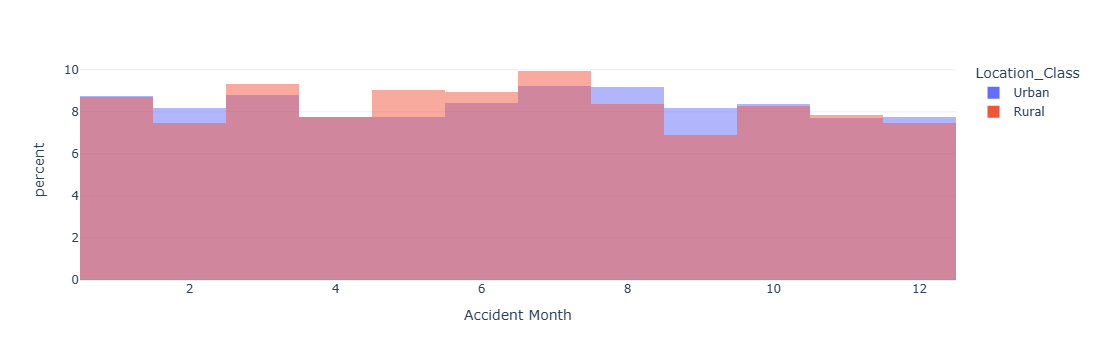

In [149]:
fig = px.histogram(df, x = 'Accident Month', color = 'Location_Class', histnorm = 'percent', barmode = 'overlay')
fig.show()

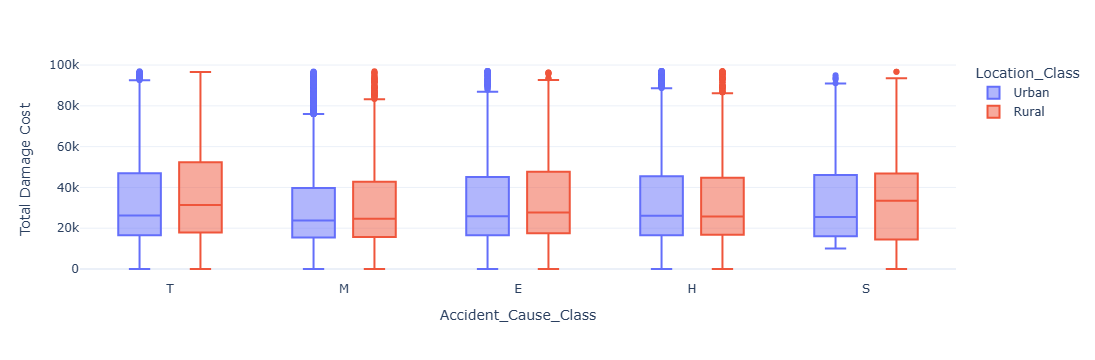

In [191]:
total_cost_iqr = df['Total Damage Cost'].quantile(0.75) - df['Total Damage Cost'].quantile(0.75)
cost_upper_bound = df['Total Damage Cost'].quantile(0.75) + (1.5 * total_cost_iqr)

total_cost_outliers = df[df['Total Damage Cost'] > cost_upper_bound]

fig = px.box(df[df['Total Damage Cost'] <= cost_upper_bound], x = 'Accident_Cause_Class', y = 'Total Damage Cost', color = 'Location_Class')
fig.show()

In [ ]:
#df_merged.to_csv('../data/processed/rail_accident_pop.csv', index = False)